# Question_2

Basic Imports and reading data

In [638]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as s
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import random
import itertools
from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_fwf("C:\\Users\\Pawan\\Desktop\\patient_satisfaction.txt",names=['PatientSatisfaction_y','Age_x1','IllnessSeverity_x2','Anxietylevel_x3'])

In [639]:
len(df)


46

In [640]:
df.head()


,PatientSatisfaction_y,Age_x1,IllnessSeverity_x2,Anxietylevel_x3
0,48,50,51,2.3
1,57,36,46,2.3
2,66,40,48,2.2
3,70,41,44,1.8
4,89,28,43,1.8


Checking for Null values

In [641]:
df.isnull().sum()

PatientSatisfaction_y    0
Age_x1                   0
IllnessSeverity_x2       0
Anxietylevel_x3          0
dtype: int64

Plotting graphs between each attribute and target.

In [642]:
def plotGraphs(x):
    fig, axs = plt.subplots(3)
    fig.set_size_inches(20, 20)
    axs[0].plot(df['Age_x1'], df['PatientSatisfaction_y'], 'o')
    axs[0].set_title('Age vs Satisfaction')
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Satisfaction')
    axs[1].plot(df['IllnessSeverity_x2'], df['PatientSatisfaction_y'], 'o', color = 'red')
    axs[1].set_title('Severity of illness vs Satisfaction')
    axs[1].set_xlabel('Severity of illness')
    axs[1].set_ylabel('Satisfaction')
    axs[2].plot(df['Anxietylevel_x3'], df['PatientSatisfaction_y'], 'o', color = 'green')
    axs[2].set_title('Anxiety Level vs Satisfaction')
    axs[2].set_xlabel('Anxiety level')
    axs[2].set_ylabel('Satisfaction')
    fig.tight_layout()

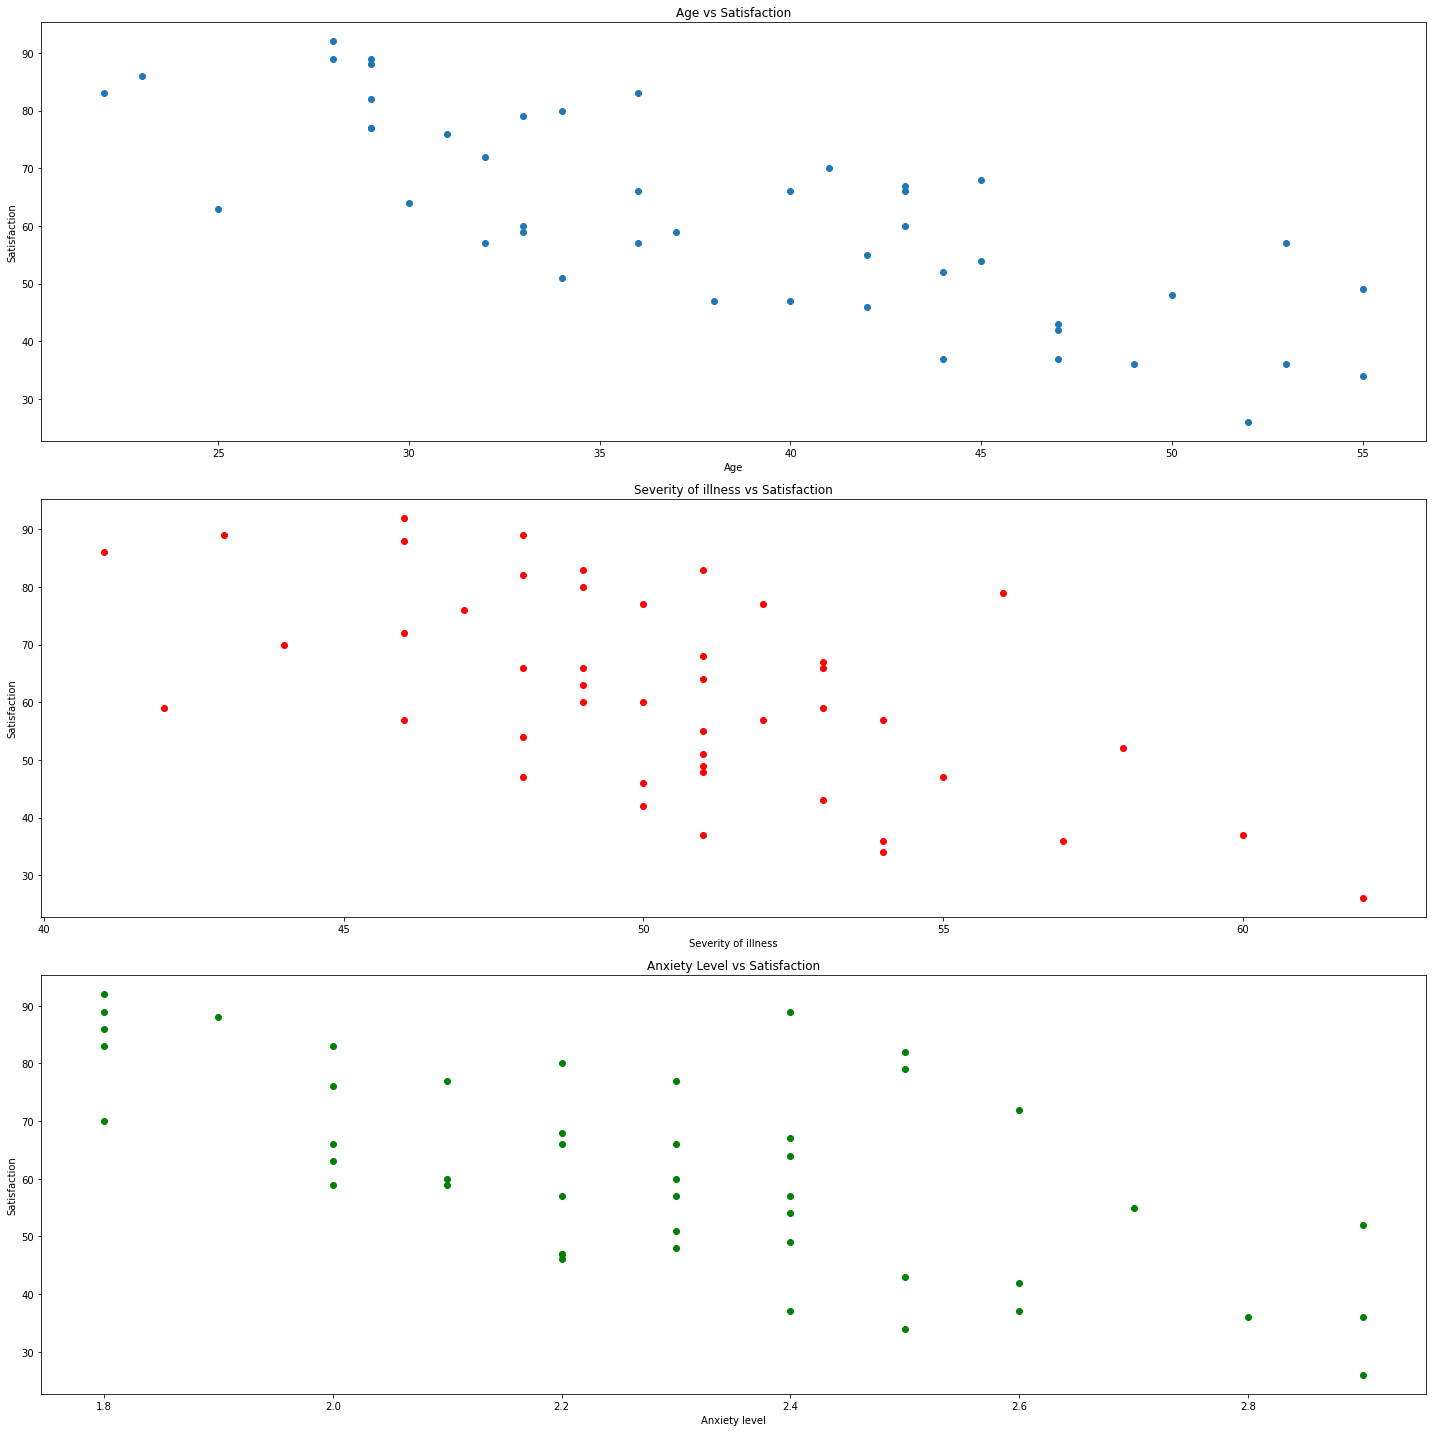

In [643]:
plotGraphs(df)

Calculating Correlational co-efficients w.r,t target(PatientSatisfaction)

In [644]:
corr_matrix = df.corr()
corr_matrix['PatientSatisfaction_y'].sort_values(ascending = False)

PatientSatisfaction_y    1.000000
IllnessSeverity_x2      -0.602942
Anxietylevel_x3         -0.644591
Age_x1                  -0.786756
Name: PatientSatisfaction_y, dtype: float64

Dividing dataset into 3 sets:
dfx1-(Satisfaction and Age)
dfx2-(Satisfaction and Illness Severity)
dfx3-(Satisfaction and Anxiety level)



In [645]:
dfx1=df.drop(['IllnessSeverity_x2','Anxietylevel_x3'],axis=1)
dfx2=df.drop(['Age_x1','Anxietylevel_x3'],axis=1)
dfx3=df.drop(['Age_x1','IllnessSeverity_x2'],axis=1)



In [646]:
dfx1

,PatientSatisfaction_y,Age_x1
0,48,50
1,57,36
2,66,40
3,70,41
4,89,28
5,36,49
6,46,42
7,54,45
8,26,52
9,77,29


In [647]:
dfx2

,PatientSatisfaction_y,IllnessSeverity_x2
0,48,51
1,57,46
2,66,48
3,70,44
4,89,43
5,36,54
6,46,50
7,54,48
8,26,62
9,77,50


In [648]:
dfx3

,PatientSatisfaction_y,Anxietylevel_x3
0,48,2.3
1,57,2.3
2,66,2.2
3,70,1.8
4,89,1.8
5,36,2.9
6,46,2.2
7,54,2.4
8,26,2.9
9,77,2.1


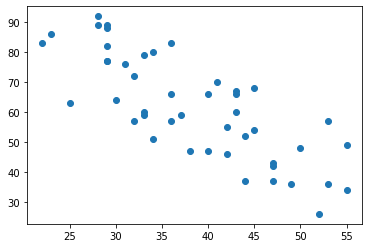

In [649]:
plt.figure()
plt.scatter(dfx1.Age_x1,dfx1.PatientSatisfaction_y)

plt.show()

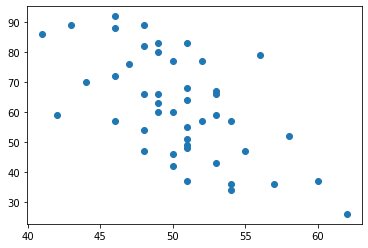

In [650]:
plt.figure()
plt.scatter(dfx2.IllnessSeverity_x2,dfx2.PatientSatisfaction_y)

plt.show()

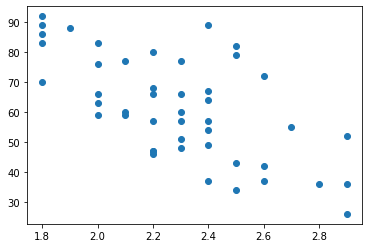

In [651]:
plt.figure()
plt.scatter(dfx3.Anxietylevel_x3,dfx3.PatientSatisfaction_y)

plt.show()

In [652]:
input_x= df.drop(['PatientSatisfaction_y'], axis = 1)
output_y = df['PatientSatisfaction_y']
output_y.shape


(46,)

In [653]:
# Using Min- Max scaling to Scale the data  
min_max_x = preprocessing.MinMaxScaler()
min_max_y = preprocessing.MinMaxScaler()
def min_max_scaling(input_x,output_y):
    scaled_X = min_max_x.fit_transform(input_x)
    scaled_y = min_max_y.fit_transform(output_y)
    scaled_y = scaled_y.reshape(output_y.shape[0],)
    return scaled_X, scaled_y

Observations:

All the features are some what inversely proportional to the satisfaction i.e if age,severity,anxietylevel increases patientsatisfaction is decreasing.Age vs Patient satisfaction is comparitively less skewed which indicates that it is more linearly correlated with patient satisafaction.

Functions for weight_bias,batch gradient descent

In [654]:
def weight_bias(input_x,output_y):
    num_rows,num_attributes = input_x.shape[0],input_x.shape[1]
    bias = 0
    weights = np.ones(shape=(num_attributes))
    return bias, weights

In [655]:
weight_bias(input_x,output_y)

(0, array([1., 1., 1.]))

In [656]:
def result(Age,Severity_of_illness,Anxiety_level,w,b):
    scaled_X = min_max_x.transform([[Age, Severity_of_illness,Anxiety_level]])[0]

    
    scaled_target = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + b
    

    return min_max_y.inverse_transform([[scaled_target]])[0][0]

In [657]:
def batch_gradient_descent(input_x, output_y, iterations, alpha):
    num_rows = input_x.shape[0]
    bias, weights = weight_bias(input_x, output_y)
    cost_list = []
    iter_list = []
    for i in range(iterations):        
        y_hat = np.dot(weights, input_x.T) + bias        
        weightsderivative = -(2/num_rows)*(input_x.T.dot(output_y-y_hat))
        biasderivative = -(2/num_rows)*np.sum(output_y-y_hat)        
        weights = weights - alpha *  weightsderivative
        bias = bias - alpha * biasderivative
        # Mean Square Error
        cost = np.mean(np.square(output_y-y_hat))
        cost_list.append(cost)
        iter_list.append(i)
    return weights,bias,cost,cost_list,iter_list


In [658]:
def stochastic_gradient_descent(input_x, output_y, iterations, alpha ):
 
    num_rows = input_x.shape[0]
    bias, weights = weight_bias(input_x, output_y)
    
    cost_list = []
    iter_list = []
    
    for i in range(iterations):
        # random index
        rand_i = random.randint(0,num_rows-1) 
        s_x = input_x[rand_i]
        s_y = output_y[rand_i]
        
        y_hat = np.dot(weights, s_x.T) + bias
    
        weightsderivative = -(2/num_rows)*(s_x.T.dot(s_y-y_hat))
        biasderivative = -(2/num_rows)*(s_y-y_hat)
        
        weights = weights - alpha * weightsderivative
        bias = bias - alpha * biasderivative
        
        cost = np.square(s_y-y_hat)
        
        cost_list.append(cost)
        iter_list.append(i)  
            
    return weights, bias, cost, cost_list, iter_list


In [659]:
# Function for Mini Batch Gradient Descent
def mini_batch_gradient_descent(input_x, output_y, iterations, batsize ,alpha):    
    num_rows = input_x.shape[0]
    bias, weights = weight_bias(input_x, output_y)
    
    # In this case mini batch becomes same as batch gradient descent
    if batsize > num_rows: 
        batsize = num_rows
        
    cost_list = []
    iter_list = []
    
    num_batches = int(num_rows/batsize)
    
    for i in range(iterations):    
        rand_i = np.random.permutation(num_rows)
        temp_x = input_x[rand_i]
        temp_y = output_y[rand_i]
        
        for j in range(0,num_rows,batsize):
            new_x = temp_x[j:j+batsize]
            new_y = temp_y[j:j+batsize]
            y_hat = np.dot(weights, new_x.T) + bias
            
            weightsderivative = -(2/len(new_x))*(new_x.T.dot(new_y-y_hat))
            biasderivative = -(2/len(new_x))*np.sum(new_y-y_hat)
            
            weights = weights - alpha* weightsderivative
            bias = bias - alpha * biasderivative
            
            cost = np.mean(np.square(new_y-y_hat)) # MSE (Mean Squared Error)
            cost_list.append(cost)
            iter_list.append(i)
        
    return weights, bias, cost, cost_list, iter_list


In [660]:
def meansquare_err(a, p):
    e_sum = 0.0
    for j in range(len(a)):
        error_p = p[j] - a[j]
        e_sum += (error_p ** 2)
        mean_sq_error = e_sum / float(len(a))
    return mean_sq_error

In [661]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold 

all_data=[dfx1,dfx2,dfx3]

def display_error():
    for i in all_data:
        lin_reg = LinearRegression()
        yplt=i['PatientSatisfaction_y']
        xplt=i.drop('PatientSatisfaction_y',axis=1)

        kf = KFold(n_splits=10) 

        kf.get_n_splits(xplt) 

        KFold(n_splits=2, shuffle=False)
        scores_mse = cross_val_score(lin_reg, xplt, yplt, scoring = "neg_mean_squared_error", cv=10)
        print(f'Score_mse: {np.sqrt(-scores_mse)}')

In [662]:
display_error()

Score_mse: [ 9.56732288 10.56752124 15.63268824 10.28032238  3.61089596 11.86041449
 12.14816904  8.63691689  8.98849145 13.96439987]
Score_mse: [10.68549235 15.18766759 12.21361456 16.90154389 11.19032092  9.40269512
 19.00113203 12.34082088 16.35887131 16.00450066]
Score_mse: [ 8.75774945 12.16316862 17.87117379 14.0302929  11.1221559  14.71255401
 11.75709097 17.48044681 12.84271208 10.77835531]


Regression coefficents of each descent


                                                                    For set  1
____________
Batch Gradient Descent are: 
Weights = [0.4179258  0.58234811 0.46383198] , Bias = -0.258473872263554 , Cost = 0.29395037163707355 
_________________________________________________________________________________________________________
Stochastic Gradient Descent are: 
Weights = [0.75693173 0.80099162 0.77936936] , Bias = -0.28802935860291307 , Cost = 0.9103830604259325 
_________________________________________________________________________________________________________
 Mini Batch Gradient Descent : 
Weights = [-0.16121776  0.29903858 -0.02933229] , Bias = 0.44476650355980146 , Cost = 0.027389597681571776 
                                                                    For set  2
____________
Batch Gradient Descent are: 
Weights = [0.44161067 0.54962098 0.50084576] , Bias = -0.2691541900828415 , Cost = 0.3072249131978392 
______________________________________________________________

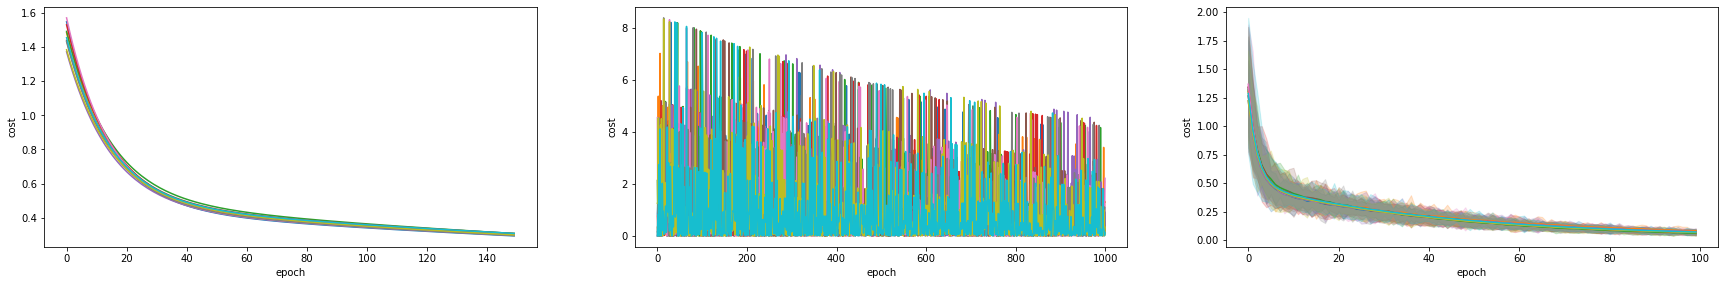

In [663]:
fig=plt.figure(figsize=(30,15))
fold = 1

Mean_square = [[],[],[]]
y_pred = [[],[],[]]

# Implementing KFold for 10 folds
kf = KFold(n_splits=10, random_state=12)

for train_index, test_index in kf.split(input_x,output_y):
    X_train, X_test = input_x.iloc[train_index], input_x.iloc[test_index]
    y_train, y_test = output_y.iloc[train_index], output_y.iloc[test_index]
    
    y_train = y_train.values.reshape(y_train.count(),1)
    scaled_X, scaled_y = min_max_scaling(X_train,y_train)
    
    
    print(' '*67, "For set ", fold)
    fold += 1
    print('_'*12)
    
    
    # Batch Gradient Descent
    
    alpha = 0.01
    iterations =150
    weight_bgd, bias_bgd, cost_bgd, cost_list, iter_list = batch_gradient_descent(scaled_X,scaled_y, iterations ,alpha)
    fig.add_subplot(3,3,1)
    s.lineplot(x= iter_list, y=cost_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
    
    print(f"Batch Gradient Descent are: ")
    print(f"Weights = {weight_bgd} , Bias = {bias_bgd} , Cost = {cost_bgd} ")    
    
    
 
    
    # Stochastic Gradient Descent
    
    alpha = 0.01
    iterations = 1000   
    weight_sgd, bias_sgd, cost_sgd, cost_list, iter_list = stochastic_gradient_descent(scaled_X,scaled_y,iterations,alpha)
    fig.add_subplot(3,3,2)
    s.lineplot(x= iter_list, y=cost_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")

    
    print('_'*105)
    print(f"Stochastic Gradient Descent are: ")
    print(f"Weights = {weight_sgd} , Bias = {bias_sgd} , Cost = {cost_sgd} ")
    
    # Mini Batch Gradient Descent
    
    iterations = 100
    batsize = 6
    alpha = 0.01
    weight_mbgd, bias_mbgd, cost_mbgd, cost_list, iter_list = mini_batch_gradient_descent(scaled_X,scaled_y,iterations,batsize ,alpha) 
    fig.add_subplot(3,3,3)
    s.lineplot(x= iter_list, y=cost_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")


    print('_'*105)
    print(f" Mini Batch Gradient Descent : ")
    print(f"Weights = {weight_mbgd} , Bias = {bias_mbgd} , Cost = {cost_mbgd} ")
    

# Calculating the mean square errors for the 3 gradient descents
    for t in X_test.T:
        y_hat = result(X_test.T[t][0],X_test.T[t][1],X_test.T[t][2],weight_bgd,bias_bgd)
        y_pred[0].append(y_hat)
        y_hat = result(X_test.T[t][0],X_test.T[t][1],X_test.T[t][2],weight_sgd,bias_sgd)
        y_pred[1].append(y_hat)
        y_hat = result(X_test.T[t][0],X_test.T[t][1],X_test.T[t][2],weight_mbgd,bias_mbgd)
        y_pred[2].append(y_hat)
        
        
    Mean_square[0].append(meansquare_err(y_test.values, y_pred[0]))
    Mean_square[1].append(meansquare_err(y_test.values, y_pred[1]))
    Mean_square[2].append(meansquare_err(y_test.values, y_pred[2]))
   
  

Random values were selcted for mini batch epochs out of which these values were optimal.

Batch Gradient Descent plotting cost over iterations: Have tried different combinations of learning rate and iterations and found that cost function reaches its minima for all folds with value of learning


Batch Gradient is effective compared to the rest of the two in my model. 